In [3]:
import warnings

import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)


Coefficients from sklearn:
 [[1.98902451]]

Intercept from sklearn:
 [0.46576234]

Number of iterations:
 207

Coefficients from gradient descent algorithm: 
 1.7895513301382733

Intercept from gradient descent algorithm: 
 0.4713233837732313


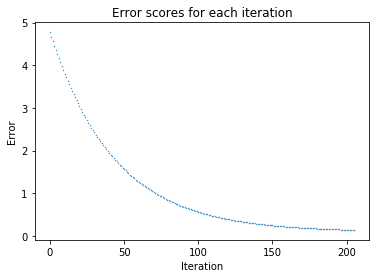

In [7]:
#cost function for the linear regression that we will try to optimize
def LR_cost_function (alpha, beta, x, y):
    '''Return the cost for a given line and data.
    Alpha and beta are the coefficients that describe the fit line, while
    x and y are lists or arrays with the x and y value of each data point
    '''
    error = 0
    n = len(x)
    for i in range(n):
        point_error = (y[i] - (alpha + beta * x[i])) ** 2 #cost function for LR
        error += point_error
    return error / n

#function we'll cal each iteration (step) of the gradient algorithm
def step (alpha_cur, beta_cur, learning_rate, x, y):
    '''Move downhill from a current cost function to a new more optimal one'''
    alpha = 0
    beta = 0
    n = len(x)
    for i in range(n):
        #partial derivative of the intercept
        point_alpha = -(2/n) * (y[i] - ((alpha_cur + beta_cur * x[i])))
        alpha += point_alpha
        #partial derivative of the slope
        point_beta = -(2/n) * x[i] * (y[i] - ((alpha_cur + beta_cur * x[i])))
        beta += point_beta
    
    new_alpha = alpha_cur - learning_rate * alpha
    new_beta = beta_cur - learning_rate * beta
    return [new_alpha, new_beta]

stop = 1000 #how many steps to take
learning_rate = .005 #how far to move with each step
alpha_start = 0 #start value intercept
beta_start = 0 #start value slope

#make some data
x = np.random.normal(0,1,100)
y = x * 2 + np.random.sample(100)

#fit min regression
regr = linear_model.LinearRegression()
regr.fit(x.reshape(-1,1), y.reshape(-1,1))

print('\nCoefficients from sklearn:\n', regr.coef_)
print('\nIntercept from sklearn:\n', regr.intercept_)

#fit iteratively optimized regression using custom gradient descent algorithm
all_error = [] #store each iteration

#provide starting values
alpha = alpha_start
beta = beta_start

#stopping rules
stop_threshold = .001
iter_count = 0

#run the algorithm
for iter in range(stop):
    alpha, beta = step(alpha, beta, learning_rate, x, y)
    iter_count += 1 #increase iter_count
    if len(all_error) > 2: #make sure there's at least 2 errors to compare
        if all_error[-2] - all_error[-1] < stop_threshold: #check if last 2 errors are less than stop thresh
            print('\nNumber of iterations:\n', iter_count)
            break
    
    error = LR_cost_function(alpha, beta, x, y)
    all_error.append(error)

print('\nCoefficients from gradient descent algorithm: \n', beta)
print('\nIntercept from gradient descent algorithm: \n', alpha)

plt.plot(all_error, 'o', ms=.4)
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Error scores for each iteration')
plt.show()

## Stopping rules

As implemented above, the only stopping rule is the number of iterations. This is not always efficient.
Modify the code by adding a stopping threshold so that the algorithm stops when the difference in error between two successive iterations is less than .001.

In [9]:
# With this rule, how many iterations do you need before you stop?

print('Number of iterations:\n',iter_count)

Number of iterations:
 207
